In [1]:
from data_io import load_tiff_files, save_tiff_file

import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd

In [2]:
pred_obj_num_masks = load_tiff_files('../results/obj_num_nerve_mask')
filtered_pred_obj_num_masks = load_tiff_files('../results/obj_num_nerve_mask')

In [3]:
loose_obj_num_masks = load_tiff_files("../data/obj_num_nerve_mask")

In [4]:
nerve_sizes = np.hstack([np.unique(nerve_mask[nerve_mask > 0], return_counts=True)[1]
                         for nerve_mask in filtered_pred_obj_num_masks.values()])

In [5]:
# Removal of small objects
for case_id, nerve_mask in filtered_pred_obj_num_masks.items():
    unique_objects, counts = np.unique(nerve_mask[nerve_mask > 0], return_counts=True)

    small_objects = unique_objects[counts < 4]

    for obj in small_objects:
        nerve_mask[nerve_mask == obj] = 0

    # print(f"Case {case_id}: {len(small_objects)} small objects removed")

In [6]:
# Remap object numbers to be sequential after filtering
for case_id, nerve_mask in filtered_pred_obj_num_masks.items():
    unique_objects = np.unique(nerve_mask)

    amount_of_objects_before = unique_objects.max()
    unique_objects = unique_objects[unique_objects > 0]

    # Create a mapping from old object numbers to new sequential ones
    object_mapping = {old: new for new, old in enumerate(unique_objects, start=1)}

    # Apply mapping to the nerve mask
    vectorized_mapping = np.vectorize(lambda x: object_mapping.get(x, 0))  # Map everything else to 0
    nerve_mask[:] = vectorized_mapping(nerve_mask)

    unique_objects = np.unique(nerve_mask)
    amount_of_objects_after = unique_objects.max()

    # print(f"Case {case_id}: {amount_of_objects_before} -> {amount_of_objects_after}")

In [7]:
# for case_id, nerve_mask in filtered_pred_obj_num_masks.items():
#     save_tiff_file(f"../results/filtered_obj_num_nerve_mask", case_id, nerve_mask)
#     save_tiff_file(f"../results/filtered_bin_nerve_mask", case_id, nerve_mask, binary=True)

In [8]:
cmu_font = font_manager.FontProperties(fname="../cmu.serif-roman.ttf")

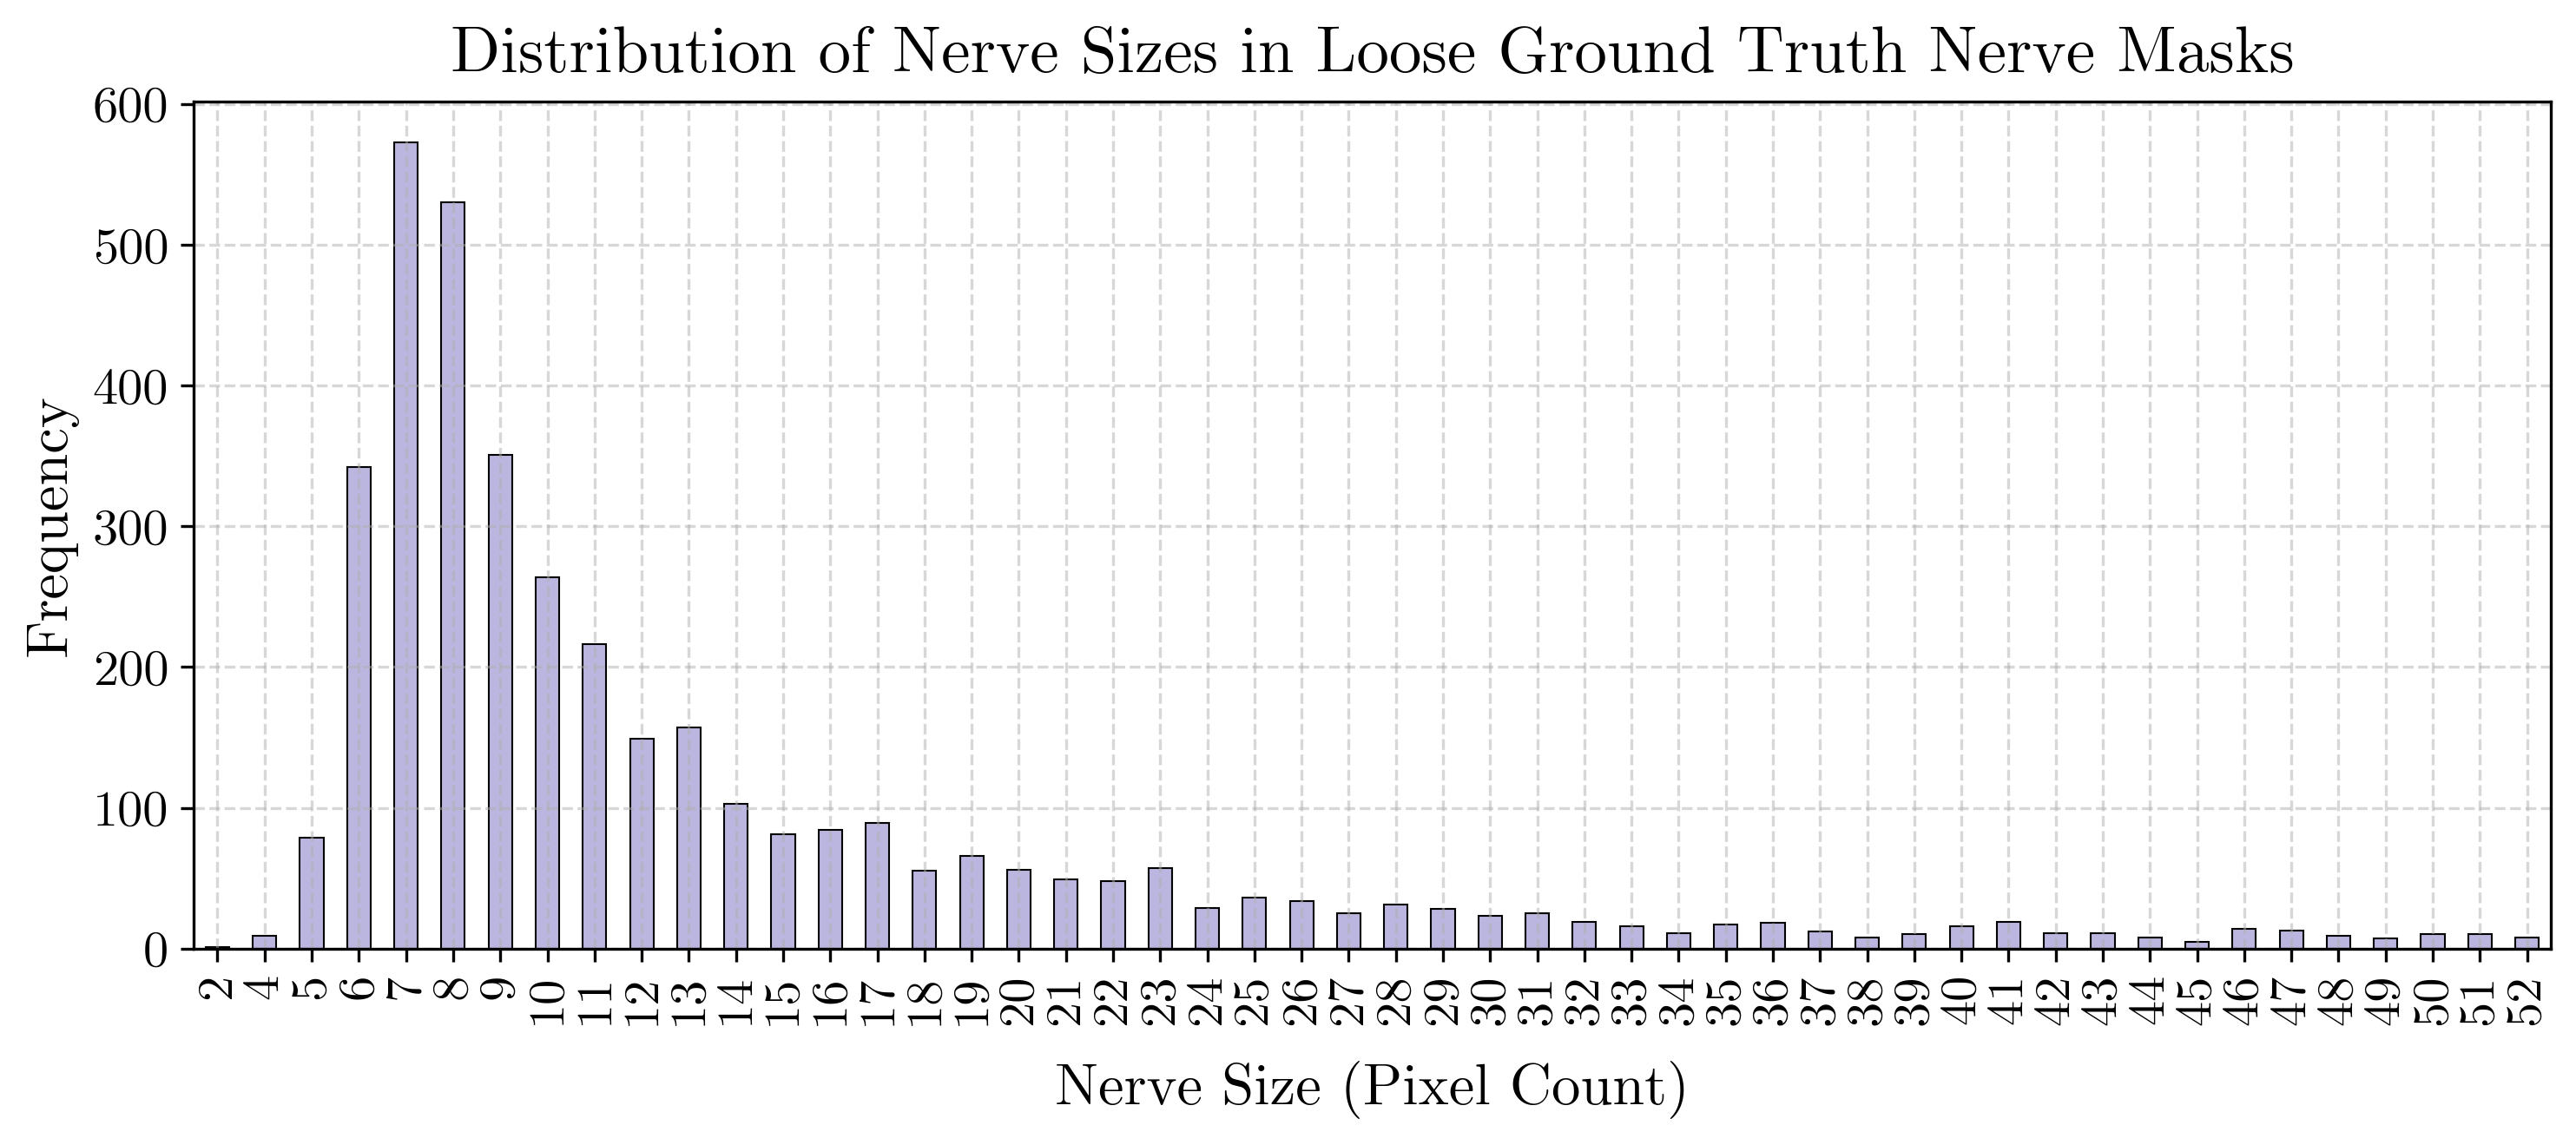

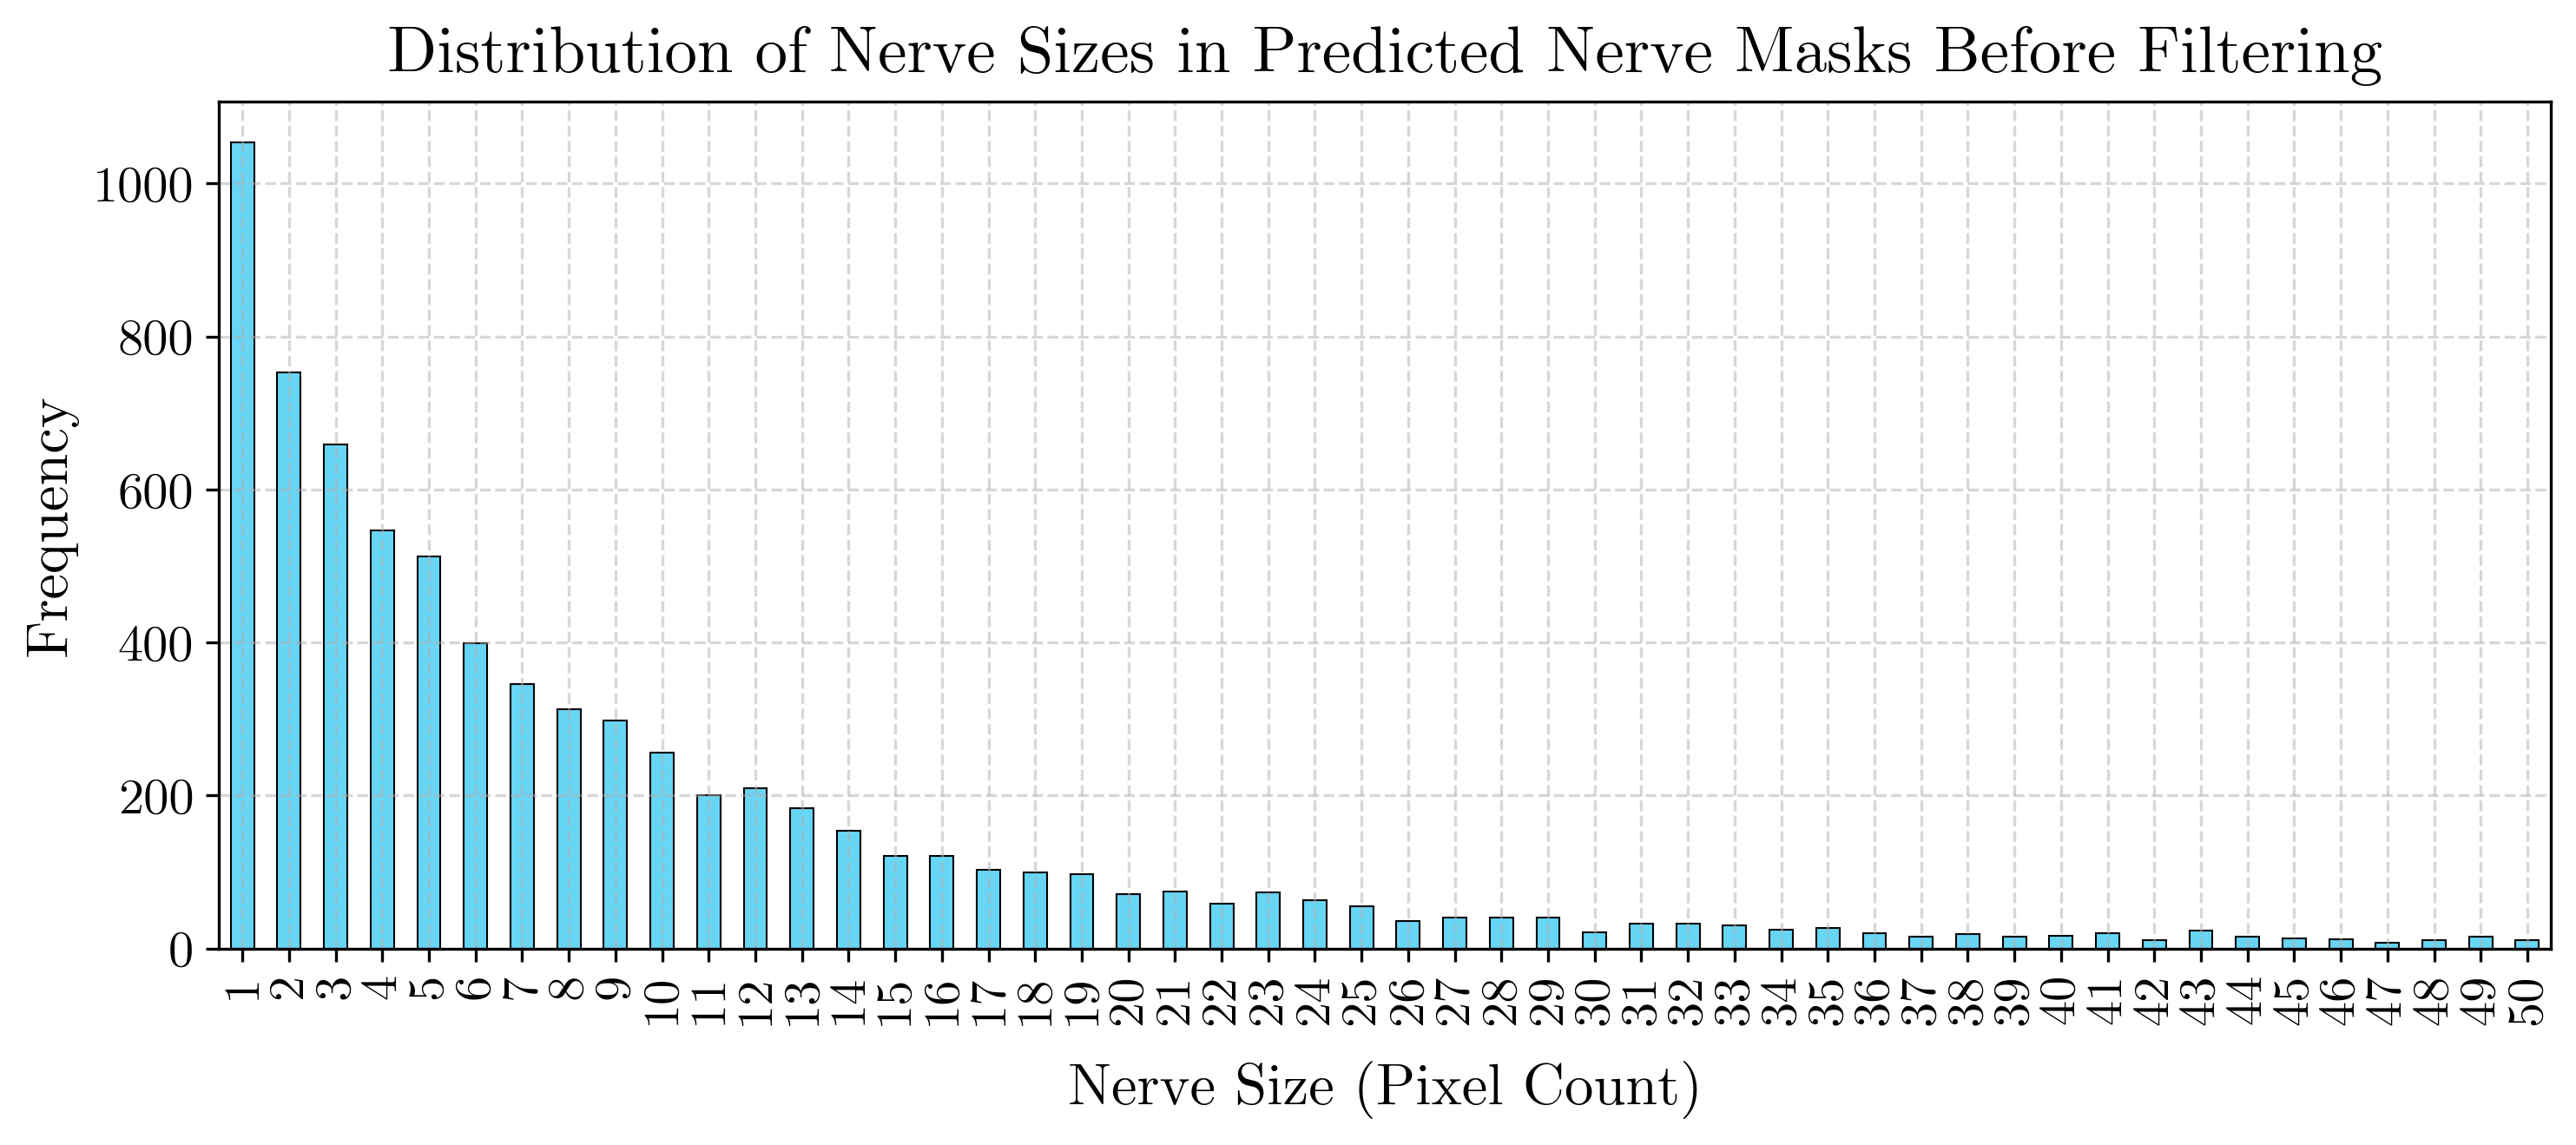

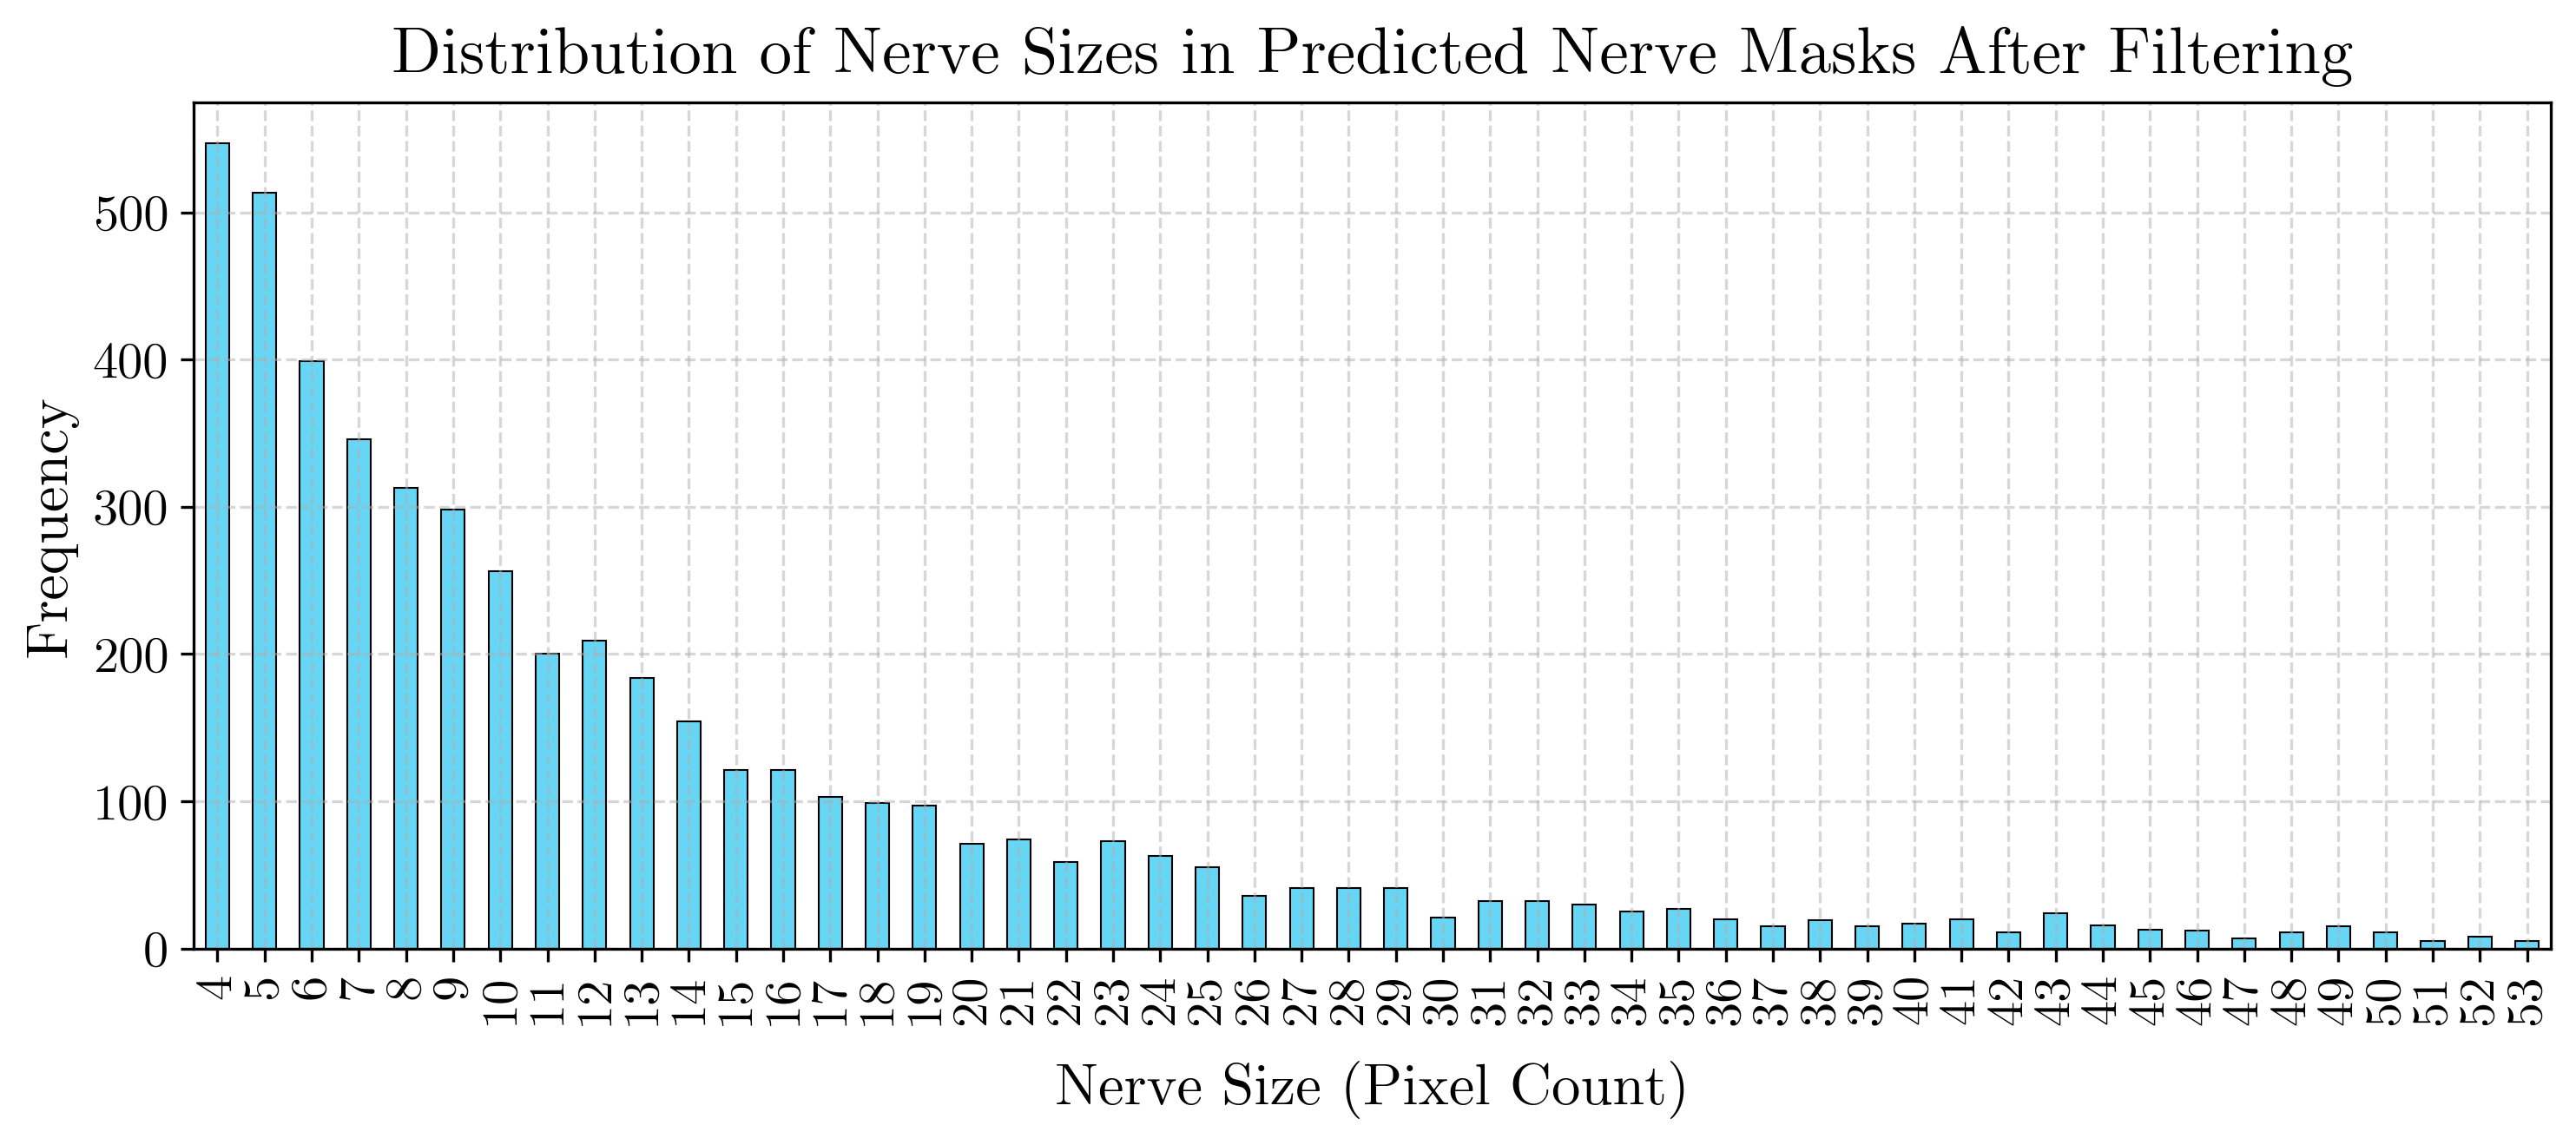

In [9]:
datasets = {
    "ref": {
        "masks": loose_obj_num_masks,
        "color": "#BBB6DF",
        "title": "Distribution of Nerve Sizes in Loose Ground Truth Nerve Masks"
    },
    "pred": {
        "masks": pred_obj_num_masks,
        "color": "#67D6F5",
        "title": "Distribution of Nerve Sizes in Predicted Nerve Masks Before Filtering"
    },
    "pred_filtered": {
        "masks": filtered_pred_obj_num_masks,
        "color": "#67D6F5",
        "title": "Distribution of Nerve Sizes in Predicted Nerve Masks After Filtering"
    }
}

for key, info in datasets.items():
    nerve_sizes = np.hstack([
        np.unique(mask[mask > 0], return_counts=True)[1]
        for mask in info["masks"].values()
    ])

    value_counts = pd.Series(nerve_sizes).value_counts().sort_index().head(50)

    plt.figure(figsize=(10, 4.5), dpi=300)
    value_counts.plot(kind='bar', color=info["color"], edgecolor="black", linewidth=0.5)
    plt.xlabel('Nerve Size (Pixel Count)', fontproperties=cmu_font, fontsize=16, labelpad=10)
    plt.ylabel('Frequency', fontproperties=cmu_font, fontsize=16)
    plt.title(info["title"], fontproperties=cmu_font, fontsize=18, y=1.01)
    plt.xticks(rotation=90, fontproperties=cmu_font, fontsize=14)
    plt.yticks(fontproperties=cmu_font, fontsize=14)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()